In [2]:
import abcd_graph
from umap import UMAP
import scipy.sparse as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from partition_sknetwork import ECG
from sklearn.decomposition import TruncatedSVD
from tqdm import tqdm

import os
import subprocess

from cove import COVE
from cove.dimension_reduction import LaplacianEigenmap, UMAPLE
from utils import *

In [3]:
## path to julia
julia = '~/.juliaup/bin/julia'
#julia = '/Applications/Julia-1.7.app/Contents/Resources/julia/bin/julia ' ## you may need the full path here

## location of the CGE Julia script (Comparing Graph Embeddings framework)
cge = 'CGE_CLI.jl '

In [4]:
graphs = ["football", "primary1", "primary2", "hci", "highschool", "cora_small", "airport", "eu-core", "as", "cora"]

n_walks = 10
walk_len = 40
window_size=7

data = []
vectorizer = COVE(window_length=window_size, walks_per_node = n_walks, walk_length = walk_len)
random_state = np.random.RandomState(42)
for i, graph in enumerate(graphs):
    print(graph)
    adjacency, labels = load_graph(graph)
    labels = ECG(random_state=random_state).fit_predict(adjacency)

    print("\tCOVE+UMAP")
    high = vectorizer.fit(adjacency).cooccurance_csr_
    low = UMAP(metric="hellinger", random_state=random_state).fit_transform(high)
    jsg, jsl = JS(adjacency, low, julia, cge, labels, random_state=random_state)
    data.append({"method":"COVE+UMAP", "name":graph, "JS-Global":jsg, "JS-Local":jsl})
    
    print("\tCOVE+UMAPLE")
    low = UMAPLE(dimension=2, metric="hellinger", random_state=random_state).fit_transform(high, adjacency)
    jsg, jsl = JS(adjacency, low, julia, cge, labels, random_state=random_state)
    data.append({"method":"COVE+UMAPLE", "name":graph, "JS-Global":jsg, "JS-Local":jsl})

    print("\tCOVE+SVD")
    low = TruncatedSVD(n_components=2, random_state=random_state).fit_transform(high)
    jsg, jsl = JS(adjacency, low, julia, cge, labels, random_state=random_state)
    data.append({"method":"COVE+SVD", "name":graph, "JS-Global":jsg, "JS-Local":jsl})

    print("\tCOVE+PCA")

    print("\tN2V")
    low = node2vec(adjacency, 2, num_walks=n_walks, walk_length=walk_len, window_size=window_size, random_state=random_state)
    jsg, jsl = JS(adjacency, low, julia, cge, labels, random_state=random_state)
    data.append({"method":"N2V", "name":graph, "JS-Global":jsg, "JS-Local":jsl})

    print("\tN2V+UMAP")
    high = node2vec(adjacency, 64, num_walks=n_walks, walk_length=walk_len, window_size=window_size, random_state=random_state)
    low = UMAP(metric="cosine", random_state=random_state).fit_transform(high)
    jsg, jsl = JS(adjacency, low, julia, cge, labels, random_state=random_state)
    data.append({"method":"N2V+UMAP", "name":graph, "JS-Global":jsg, "JS-Local":jsl})

    print()
    print()

df = pd.DataFrame(data)
df.to_pickle("real_cge.pkl")

football
	COVE+UMAP


/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


	COVE+UMAPLE


/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


	COVE+SVD
	COVE+PCA
	N2V
	N2V+UMAP


/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(




primary1
	COVE+UMAP


/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


	COVE+UMAPLE


/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


	COVE+SVD
	COVE+PCA
	N2V
	N2V+UMAP


/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(




primary2
	COVE+UMAP


/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


	COVE+UMAPLE


/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


	COVE+SVD
	COVE+PCA
	N2V
	N2V+UMAP


/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(




hci
	COVE+UMAP


/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


	COVE+UMAPLE


/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


	COVE+SVD
	COVE+PCA
	N2V
	N2V+UMAP


/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(




highschool
	COVE+UMAP


/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


	COVE+UMAPLE


/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


	COVE+SVD
	COVE+PCA
	N2V
	N2V+UMAP


/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(




cora_small
	COVE+UMAP


/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely d

	COVE+UMAPLE


/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


	COVE+SVD
	COVE+PCA
	N2V
	N2V+UMAP


/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(




airport
	COVE+UMAP


/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


	COVE+UMAPLE


/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


	COVE+SVD
	COVE+PCA
	N2V
	N2V+UMAP


/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(




eu-core
	COVE+UMAP


/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:127: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 37810 edges.
It has only fully disconnected 19 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


	COVE+UMAPLE


/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:127: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 37810 edges.
It has only fully disconnected 19 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


	COVE+SVD
	COVE+PCA
	N2V
	N2V+UMAP


/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(




as
	COVE+UMAP


/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/numba/np/ufunc/dufunc.py:290: RuntimeWarning: invalid value encountered in sparse_correct_alternative_hellinger
  return super().__call__(*args, **kws)
/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:127: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 56 edges.
It has only fully disconnected 4 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


	COVE+UMAPLE


/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/numba/np/ufunc/dufunc.py:290: RuntimeWarning: invalid value encountered in sparse_correct_alternative_hellinger
  return super().__call__(*args, **kws)
/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:127: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 56 edges.
It has only fully disconnected 4 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


	COVE+SVD
	COVE+PCA
	N2V
	N2V+UMAP


/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(




cora
	COVE+UMAP


/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/numba/np/ufunc/dufunc.py:290: RuntimeWarning: invalid value encountered in sparse_correct_alternative_hellinger
  return super().__call__(*args, **kws)
/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/umap/umap_.py:127: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 38 edges.
It has only fully disconnected 1 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


Error running CLI command:
 ~/.juliaup/bin/julia CGE_CLI.jl  -g edgelist.dat -c labels.dat + -e emb.dat --seed 1244565898 2>_stderr
Make sure Julia and CGE are correctly installed


TypeError: cannot unpack non-iterable int object

/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/matplotlib/transforms.py:2437: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),
/Users/ryandewolfe/miniforge3/envs/COVE/lib/python3.13/site-packages/matplotlib/transforms.py:2437: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


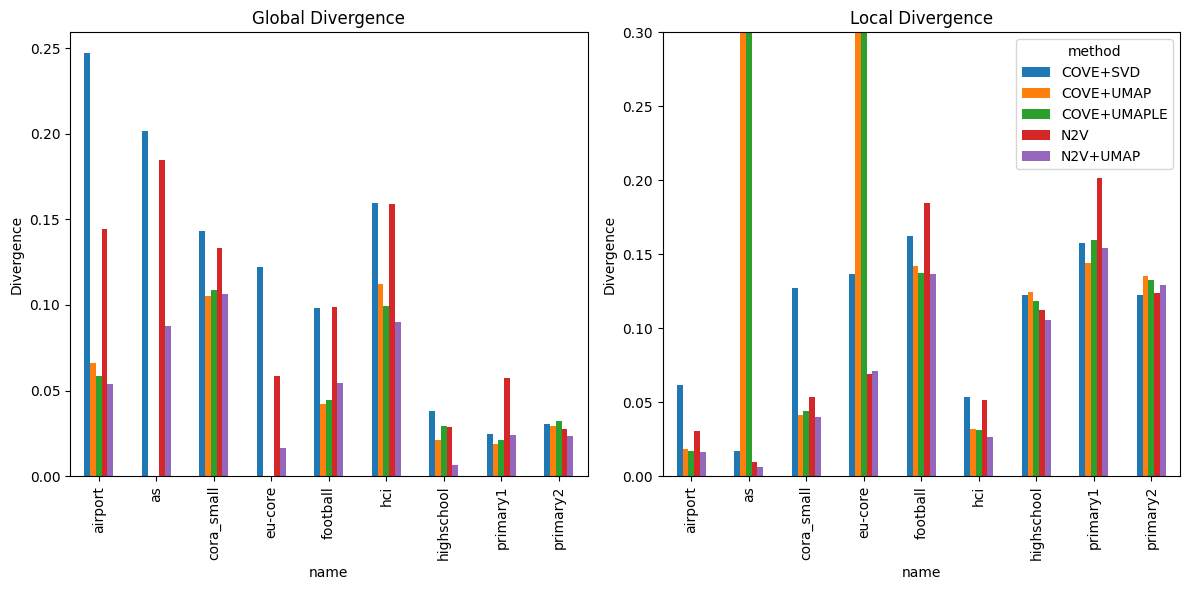

In [7]:
df2 = df.groupby(["name", "method"]).mean()
fig, axs = plt.subplots(1,2, figsize=(12,6))
df2["JS-Global"].unstack().plot(kind="bar", ax = axs[0], legend=False)
axs[0].set_ylabel(r"Divergence")
axs[0].set_title("Global Divergence")
df2["JS-Local"].unstack().plot(kind="bar", ax=axs[1], legend=True)
axs[1].set_ylim((0, 0.3))
axs[1].set_ylabel(r"Divergence")
axs[1].set_title("Local Divergence")
plt.tight_layout()